## 데이터 전처리 절차 

### 데이터 오류 분석

결측값, 이상값, 노이즈, 모순데이터, 불균형 데이터 등

### 데이터 전처리 대상 

모든 데이터 대상, 비정형/반정형 데이터에 집중

### 데이터 전처리 방법 결정 

삭제, 대체(범주형은 최빈값), 예측값 삽입, 스케일링, 변수 추가 또는 변환 

### 데이터 결측값 처리 

삭제, 대체, 예측값 삽입, 수작업

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

font_path = 'C:/Users/kj/Desktop/myGit/PYTHON101/pandas/study/data/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path)

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['figure.figsize'] = (4, 4)


## 타이타닉 데이터셋 컬럼
* survivied: 생존여부 (1: 생존, 0: 사망)
* pclass: 좌석 등급 (1등급, 2등급, 3등급)
* sex: 성별
* age: 나이
* sibsp: 형제 + 배우자 수
* parch: 부모 + 자녀 수
* fare: 좌석 요금
* embarked: 탑승 항구 (S, C, Q)
* class: pclass와 동일
* who: 남자(man), 여자(woman), 아이(child)
* adult_male: 성인 남자 여부
* deck: 데크 번호 (알파벳 + 숫자 혼용)
* embark_town: 탑승 항구 이름
* alive: 생존여부 (yes, no)
* alone: 혼자 탑승 여부

In [4]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## 데이터셋에서 결측값 확인
```
DataFrame.info()
DataFrame.isnull()
DataFrame.isnull().sum()
```

In [8]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## 데이터셋 결측치 삭제 
```
DataFrame.dropna() : 결측값 있는 모든 행 삭제(default axis=0)
titanic['embark_town'].dropna() : 지정한 컬럼명에서 결측값을 삭제하고 출력 
titanic.dropna(thresh=int(len(titanic) / 2), axis=1) : 전체 데이터셋에서 50% 이상 결측치를 포함하는 feature(변수, 컬럼, 필드)를 삭제
50% 이상의 결측치를 가진 열을 제거
```


In [13]:
titanic.dropna(thresh=int(len(titanic) / 2), axis=1, inplace=True)

In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


## 데이터셋 결측치 대체
```
DataFrame.fillna() : 누락된 값에 통계 값으로 대체 또는 모든 누락 값을 '0'(str)으로 대체
DataFrame.fillna(0) : 모든 결측값을 0(int)로 대체
titanic['age'].fillna(0) : age컬럼의 결측값을 0으로 대체
titanic['age'].fillna(titanic['age'].mean()) : 결측값을 평균 값으로 대체 
```
수치데이터 : 평균값
범주데이터 : 최빈값
0으로 대체하는 방법은 데이터의 편향(bias)가 발생할 가능성이 높다.

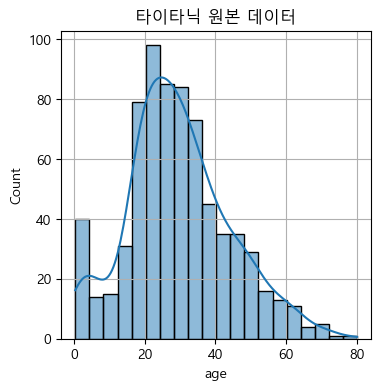

In [60]:
plt.figure(figsize=(4, 4))
sns.histplot(titanic['age'], kde=True)
plt.title('타이타닉 원본 데이터')
plt.grid()
plt.show()

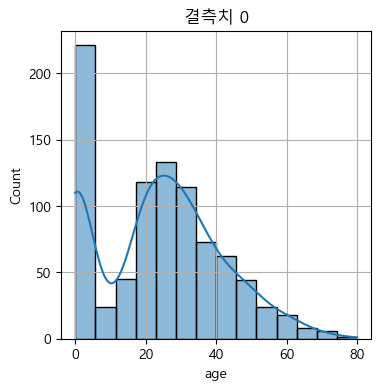

In [62]:
# age 열에 결측치를 0(int)로 채웠을 때
plt.figure(figsize=(4, 4))
sns.histplot(titanic['age'].fillna(0), kde=True)
plt.title('결측치 0')
plt.grid()
plt.show()


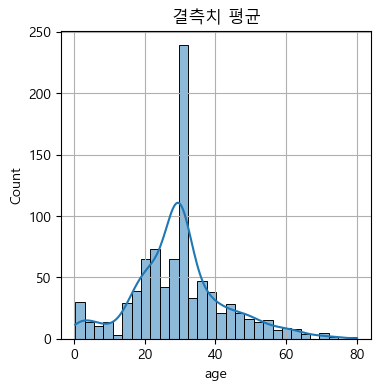

In [64]:
# age 열에 결측치를 평균값으로 채웠을 때
plt.figure(figsize=(4, 4))
sns.histplot(titanic['age'].fillna(titanic['age'].mean()) , kde=True)
plt.title('결측치 평균')
plt.grid()
plt.show()

In [ ]:
# age 열에 결측치를 중앙값으로 채웠을 때

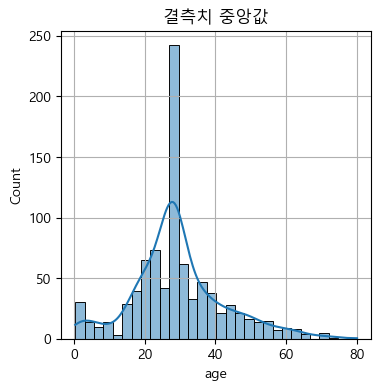

In [74]:
plt.figure(figsize=(4, 4))
sns.histplot(titanic['age'].fillna(titanic['age'].median()), kde=True)
plt.title('결측치 중앙값')
plt.grid()
plt.show()

In [ ]:
※ 평균값과 중앙값의 차이가 크게 없어 평균값으로 대체

In [80]:
titanic.fillna({'age':titanic.age.median()}, inplace=True)

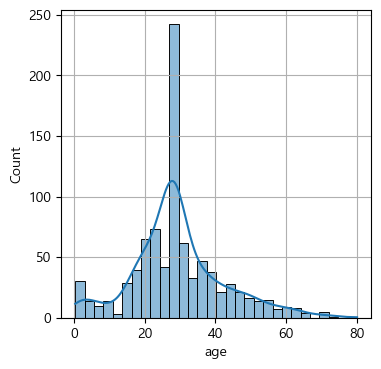

In [86]:
#plt.figure(figsize=(4, 4))
sns.histplot(titanic['age'], kde=True)
plt.grid()
plt.show()

In [88]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [106]:
titanic['embarked'].mode()

0    S
Name: embarked, dtype: object

In [112]:
titanic.fillna({'embarked':titanic['embarked'].mode()[0]}, inplace=True)
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])

In [108]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [110]:
titanic.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

## 데이터 이상값 처리 
이상값(Outlier) : 일반적인 다른 값과 멀리 떨어져 있는 값
이상값 발생 원인 : 잘못된 수집 및 입력, 고의적인 이상값, 표본 설정 오류 

## 이상값 검출 방법 

### ESD(Extream Studenized Deviation) 

평균과 표준편차를 이용하여 이상값의 범위를 한정 

```
#  평균(m μ), 표준편차(s)라고 할때
m - 3s < 정상데이터 < m + 3s
```

### 사분위수
```
IQR = Q3 - Q1
Q1 - (IQR * 1.5) < 정상데이터 < Q3 + (IQR * 1.5)
하한값, 상한값 사이의 정상데이터 
```

### 기하평균 
기하평균 - 2.5s < 정상데이터 < 기하평균 + 2.5s




## 데이터 이상값 시각화
* 히스토그램, 밀도차트 : 평균, 중앙값으로 부터 먼 값
* 박스플롯 : 수염 밖으로 이상값이 표시됨
* 산포도 : 다른 값하고 멀리 떨어져 있는 값, scatter가 대표적 

## 분석 기법을 이용한 이상값 확인 
비지도학습의 군집 기법
마할라노비스 거리 : 데이터 분산을 고려한 거리나 다변량
iForeset(Isolation forest) : Decision Tree(의사결정 트리, 일반적으로 이진트리이용), 분할횟수로 이상값 검출 


## 이상값 처리 방법
* 삭제
* 대체 : 통계값(평균, 중앙, 최빈값 등)
* 회귀값 : 회귀모델(결과가 어떤 값)의 결과 값으로 대체 
* 구간화 : 정렬된 데이터를 여러 개의 구간으로 배분한 후 구간의 대표값으로 대체
* 군집화 : 비슷한 성격을 가진 크럴스터 단위로 묶은 다음 처리 
* 변환 : 오른쪽 꼬리가 긴 경우 로그, 제곱근 변환하여 큰 값을 작게 만들고 왼쪽 꼬리가 긴 경우는 지수 변환 제곱변환하여 값을 크게 한다 

In [ ]:
## 기하평균

In [ ]:
def geometric_mean(x):
    pass 

In [ ]:
## 조화평균

In [ ]:
def harmonic_mean(x):
    pass 

In [ ]:
from statistics import harmonic_mean # 3.5 이상 사용 가능 


In [ ]:
## log

In [139]:
data = [1, 10, 100]

#  자연로그(밑e)
a = np.log(data)

#  상용로그
b = np.log10(data)

#  밑 2인 로그
c = np.log2(data)

print(a)
print(b)
print(c)

[0.         2.30258509 4.60517019]
[0. 1. 2.]
[0.         3.32192809 6.64385619]


## 데이터 이상값 영향도 

### 이상값 영향을 많이 받는 것
* 평균, 분산, 표준편차 
* 앙상블 모델 : boosting
* 비지도 : 군집, k-menas

### 이상값 영향을 덜 받는 것
* 중앙값
* 지도 : 분류/회귀 -> KNN
* 비지도 : 군집-> DBSCAN

### 밀도기반 
특정 반경 안에 데이터가 몇 개 있는지 세는 방법

In [143]:

## 평균, 중앙값 영향도 
data1 = [10,20,30,40,50]
data2 = [10,20,30,40,200]

a = pd.Series(data1)
b = pd.Series(data2)

print("평균 : ", a.mean(), b.mean())
print("중앙 : ", a.median(), b.median())



평균 :  30.0 60.0
중앙 :  30.0 30.0


In [145]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [155]:
res = titanic.describe()
res

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [165]:
Q3 = res['age']['75%']
Q1 = res['age']['25%']
IQR = Q3 - Q1
print(IQR)

17.875


In [167]:
Q3 + (IQR*1.5)

64.8125

In [ ]:
# 클래스별로 운임을 histplot

In [173]:
first = titanic[titanic['class'] == 'First']['fare']
second = titanic[titanic['class'] == 'Second']['fare']
third = titanic[titanic['class'] == 'Third']['fare']

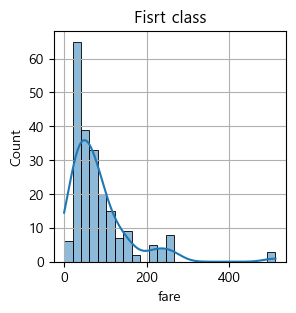

In [187]:
plt.figure(figsize=(3, 3))
sns.histplot(data=first, kde=True)
plt.title('Fisrt Class')
plt.grid()
plt.show()

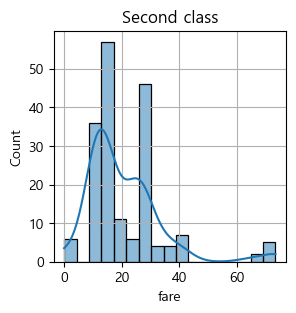

In [189]:
plt.figure(figsize=(3, 3))
sns.histplot(data=second, kde=True)
plt.title('Second Class')
plt.grid()
plt.show()

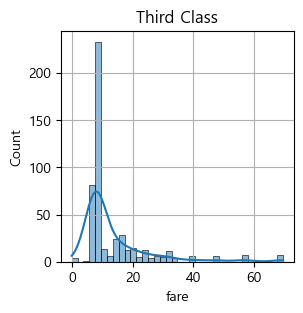

In [191]:
plt.figure(figsize=(3, 3))
sns.histplot(data=third, kde=True)
plt.title('Third Class')
plt.grid()
plt.show()

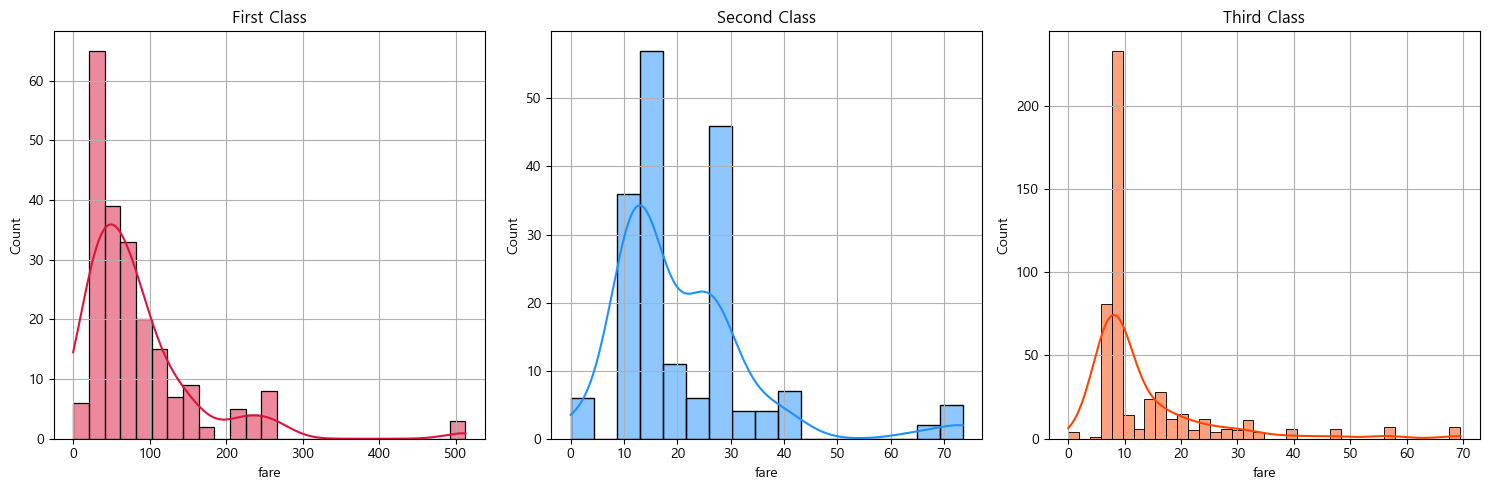

In [231]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=first, kde=True, ax=axes[0], color='#DC143C')
axes[0].set_title('First Class')
axes[0].grid()

sns.histplot(data=second, kde=True, ax=axes[1], color='#1E90FF')
axes[1].set_title('Second Class')
axes[1].grid()

sns.histplot(data=third, kde=True, ax=axes[2], color='#FF4500')
axes[2].set_title('Third Class')
axes[2].grid()

plt.tight_layout()
plt.show()